## Milestone 2

Link deployment : https://huggingface.co/spaces/galihsukmana/ML2

## Introduction

Nama : Galih Sukmanaputra  

Batch : FTDS-005-HCK  

Dataset : From https://www.kaggle.com/datasets/bhadaneeraj/cardio-vascular-disease-detection. This dataset explained about the symptoms of each patients who has cardiovasculer diseas.  
  
Objective : With classification model of machine learning we can predict each patients who got a cardiovasculer diseas or no.

## Import Libraries

Dalam tahapan ini dilakukan import seluruh library yang dibutuhkan

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.metrics import recall_score,accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

## Data Loading

Looking for feature and target from dataset

In [2]:
# Load Dataset

data = pd.read_csv("cardio_train.csv",sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [4]:
data[data.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


There is no duplication

In [5]:
# Duplikasi dataset
data_duplicate = data.copy()

Duplicating basic data

In [6]:
# Check Dataset-1
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Looking for type and information from each columns

In [7]:
data.isnull().sum() / data.shape[0] * 100

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

There is no missing value in dataset.

### Data Cleaning

In [8]:
age_year = data.age/365
age_tr = round(age_year)

Transform age in days into year

In [9]:
data.age = age_tr

In [10]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,990,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,991,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.0,1,155,62.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
gender = data.gender.astype('object')
data.gender = gender

transform data type of gender because there is no different between male and female.

In [12]:
data.drop('id',axis=1,inplace=True)

dropping 'id' column. because all of them are unique

In [13]:
num_col = data.describe().columns.tolist()
cat_col = data.select_dtypes(include=['object']).columns.tolist()

Splitting numerical and categorical columns

In [14]:
# numeric overview
data[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
age,69301.0,53.338177,6.765427,30.0,48.0,54.0,58.0,65.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0
alco,69301.0,0.053881,0.225784,0.0,0.0,0.0,0.0,1.0
active,69301.0,0.803986,0.396982,0.0,1.0,1.0,1.0,1.0


numerical data description

In [15]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(data[i].value_counts())
    print('-' * 10)

gender

1    45079
2    24222
Name: gender, dtype: int64
----------


In [16]:
data['gender'].replace({1:'male',2:'female'},inplace=True)

- 1 for Male  
- 2 for Female

In [17]:
# categorical overview
for i in cat_col:
    print('Column: ',i)
    print('Total unique labels: ', data[i].nunique())
    print('-' * 30)

Column:  gender
Total unique labels:  2
------------------------------


There is no categorical columns. But we should checking for next step.

In [18]:
# data.tail(100).to_csv('data_inferences.csv')

saving for model inference

### Exploratory Data Analysis (EDA)

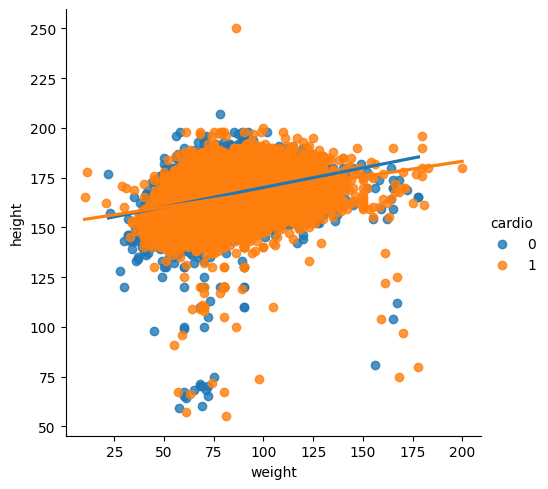

In [19]:
sns.lmplot(data=data, x='weight',y='height',hue='cardio')

Text(0.5, 1.0, 'Histogram of Age')

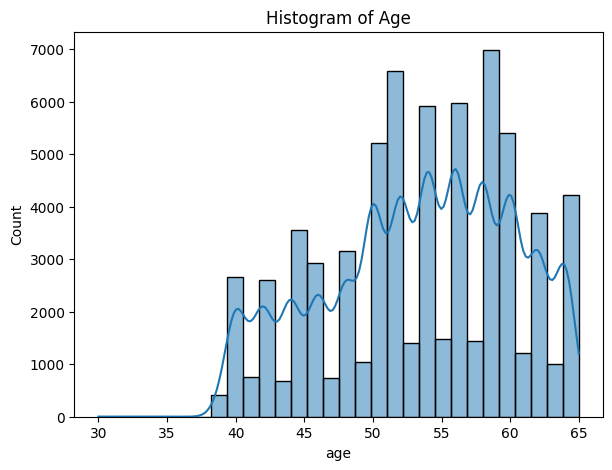

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['age'], kde=True, bins=30)
plt.title('Histogram of Age')



The distributin of 'age' looks skewed. We should check for the next part.

In [21]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,62.0,male,155,69.0,130,80,2,2,0,0,1,0
1,40.0,male,163,71.0,110,70,1,1,0,0,1,1
2,60.0,male,165,70.0,120,80,1,1,0,0,1,0
3,40.0,female,165,85.0,120,80,1,1,1,1,1,0
4,64.0,male,155,62.0,120,80,1,1,0,0,1,0


<AxesSubplot:xlabel='cardio', ylabel='age'>

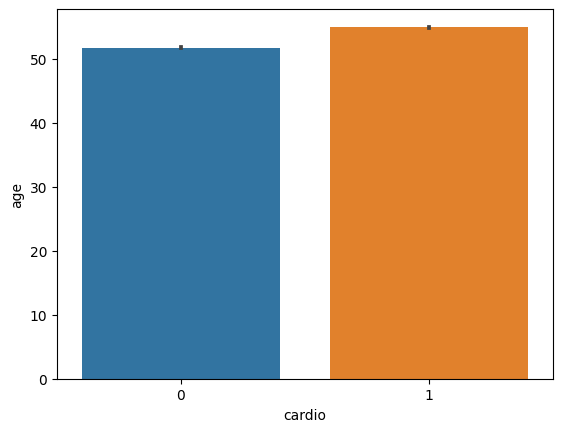

In [22]:
sns.barplot(data=data, x='cardio', y='age')


Cardio disease belong to balanced distribution for each age of patients.

<AxesSubplot:xlabel='cardio', ylabel='count'>

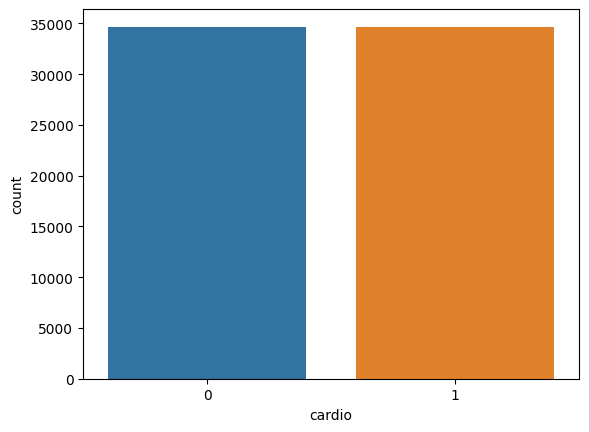

In [23]:
#looking for level of balancing income bracket 
sns.countplot(data=data,x='cardio')

cardio diseas has a balance distribution

In [24]:
!pip install phik

In [25]:
import phik

interval columns not set, guessing: ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


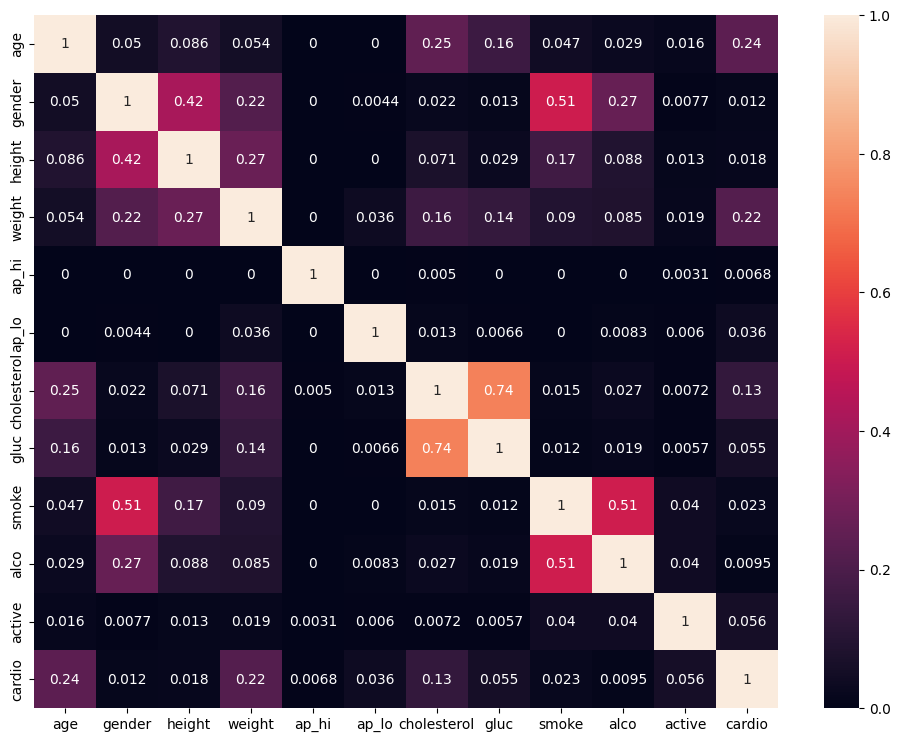

In [26]:
phik_corr = data.phik_matrix()
plt.figure(figsize=(12, 9))
sns.heatmap(phik_corr, annot= True,vmin=0, vmax=1)
plt.show()

From the phik correlation we know that every features give the positive impact to the target label 'cardio'.

### Feature Engineering

For this step we should prepared all of the things before modelling process like splitting train set and test set, transformation, normalization, scaling, encoding, etc. 

### Split between `X` (Features) and `y` (Target)

In [27]:
# Splitting between `X` and `y`

X = data.drop(['cardio'], axis=1)
y = data['cardio']
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,62.0,male,155,69.0,130,80,2,2,0,0,1
1,40.0,male,163,71.0,110,70,1,1,0,0,1
2,60.0,male,165,70.0,120,80,1,1,0,0,1
3,40.0,female,165,85.0,120,80,1,1,1,1,1
4,64.0,male,155,62.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69296,53.0,female,168,76.0,120,80,1,1,1,0,1
69297,62.0,male,158,126.0,140,90,2,2,0,0,1
69298,52.0,female,183,105.0,180,90,3,1,0,1,0
69299,61.0,male,163,72.0,135,80,1,2,0,0,0


### Split between cat and num

In [28]:
num_col2 = X.describe().columns.tolist()
cat_col2 = X.select_dtypes(include=['object']).columns.tolist()

### Split Train-Set and Test_set

In [29]:
# Splitting between Train-Set and Test-Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)
X_train

Train Size :  (55440, 11)
Test Size  :  (13861, 11)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
20646,58.0,female,174,58.0,120,80,3,3,0,0,1
58725,40.0,male,160,63.0,110,70,1,1,0,0,0
20428,52.0,male,157,64.0,120,80,1,1,0,0,1
10270,46.0,male,145,45.0,90,50,1,1,0,0,0
32844,41.0,female,173,86.0,130,100,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
27084,54.0,male,165,84.0,110,70,1,1,0,0,1
18287,48.0,male,160,60.0,110,80,2,1,0,0,1
62121,60.0,male,170,68.0,150,90,1,1,0,0,1
16692,62.0,female,178,90.0,150,100,2,1,0,0,1


In [30]:
y_train.value_counts()

0    27743
1    27697
Name: cardio, dtype: int64

The target almost has excellent balanced

In [31]:
data_eda = pd.concat([X_train, y_train], axis=1)
data_eda.shape

(55440, 12)

In [32]:
X_train_eda = X_train.copy()

### Handling Outlier

In [33]:
# check skewness
for i in X_train_eda[num_col2].columns:
    print(i, ': ', X_train_eda[num_col2][i].skew())

age :  -0.30348024813561697
height :  -0.5916797888751323
weight :  1.0162620253447627
ap_hi :  81.02678208181342
ap_lo :  32.432300884483986
cholesterol :  1.5834699412914344
gluc :  2.3862346784767703
smoke :  2.894389011335006
alco :  3.9441714028632635
active :  -1.5283715293840945


In [34]:
# check outlier
winsor = Winsorizer(capping_method='gaussian', fold=3, tail='both')
X_train_clean = winsor.fit_transform(X_train_eda)

In [35]:
for i in X_train_clean[num_col2].columns:
    print(i, ': ', X_train_clean[num_col2][i].skew())

age :  -0.30306768457856575
height :  0.08391511411244228
weight :  0.6770175092517097
ap_hi :  6.211326940104614
ap_lo :  8.125344301488854
cholesterol :  1.5834699412914344
gluc :  2.3613506670746633
smoke :  2.8943890113350057
alco :  3.9441714028632635
active :  -1.5283715293840945


Skew scores still upnormal. Next we should scaled them.

In [36]:
X_train_clean[num_col2].isnull().sum()

age            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

checking for mv

In [37]:
X_train_clean.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000
mean,53.323938,164.423630,74.048296,126.919928,89.131424,1.367731,1.223853,0.083459,0.039596,0.803589
std,6.757443,7.872087,13.854243,21.385412,67.344584,0.680810,0.561098,0.267588,0.165636,0.397286
min,33.050432,139.833943,31.071921,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,65.000000,188.927204,117.272744,615.200577,656.661134,3.000000,2.947919,0.941395,0.732464,1.000000


After mv handled

In [38]:
num_col2

['age',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

### Scaling

In [39]:
scaler = MinMaxScaler()

X_train_clean[num_col2] = scaler.fit_transform(X_train_clean[num_col2])
X_train_clean

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
20646,0.780905,female,0.695942,0.312388,0.352849,0.206424,1.0,1.0,0.0,0.0,1.0
58725,0.217517,male,0.410770,0.370392,0.339780,0.192662,0.0,0.0,0.0,0.0,0.0
20428,0.593109,male,0.349662,0.381993,0.352849,0.206424,0.0,0.0,0.0,0.0,1.0
10270,0.405313,male,0.105229,0.161577,0.313643,0.165139,0.0,0.0,0.0,0.0,0.0
32844,0.248816,female,0.675572,0.637211,0.365917,0.233947,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
27084,0.655707,male,0.512617,0.614009,0.339780,0.192662,0.0,0.0,0.0,0.0,1.0
18287,0.467911,male,0.410770,0.335589,0.339780,0.206424,0.5,0.0,0.0,0.0,1.0
62121,0.843503,male,0.614464,0.428396,0.392054,0.220185,0.0,0.0,0.0,0.0,1.0
16692,0.906102,female,0.777419,0.683614,0.392054,0.233947,0.5,0.0,0.0,0.0,1.0


Scaling using MinMaxScaler for upnormal distribution

### Encoding

In [40]:
enc = OneHotEncoder(sparse=False)

cat_enc = pd.DataFrame(enc.fit_transform(X_train_clean[['gender']]))
cat_enc.columns = enc.get_feature_names(['gender']).tolist()

review = pd.concat([X_train_clean[['gender']].reset_index(drop=True), cat_enc], axis=1)

review.sample(5)

,gender,gender_female,gender_male
28082,male,0.0,1.0
8075,male,0.0,1.0
47575,male,0.0,1.0
28648,female,1.0,0.0
10312,female,1.0,0.0


Gender has been encoded

In [41]:
y_train

20646    1
58725    1
20428    0
10270    0
32844    1
        ..
27084    1
18287    0
62121    1
16692    1
1432     0
Name: cardio, Length: 55440, dtype: int64

In [42]:
df_train_final = pd.concat([X_train_clean[num_col2].reset_index(drop=True), cat_enc, y_train.reset_index(drop=True)], axis=1)
df_train_final.shape

(55440, 13)

In [43]:
df_train_final.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,gender_female,gender_male,cardio
0,0.780905,0.695942,0.312388,0.352849,0.206424,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1
1,0.217517,0.410770,0.370392,0.339780,0.192662,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.593109,0.349662,0.381993,0.352849,0.206424,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,0.405313,0.105229,0.161577,0.313643,0.165139,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.248816,0.675572,0.637211,0.365917,0.233947,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1


### VIF  

In [44]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
calc_vif(df_train_final)

,variables,VIF
0,age,1.091156
1,height,1.509009
2,weight,1.212934
3,ap_hi,1.226959
4,ap_lo,1.059369
5,cholesterol,1.346581
6,gluc,1.266566
7,smoke,1.246822
8,alco,1.138058
9,active,1.003570


looking for vif scores to consideration

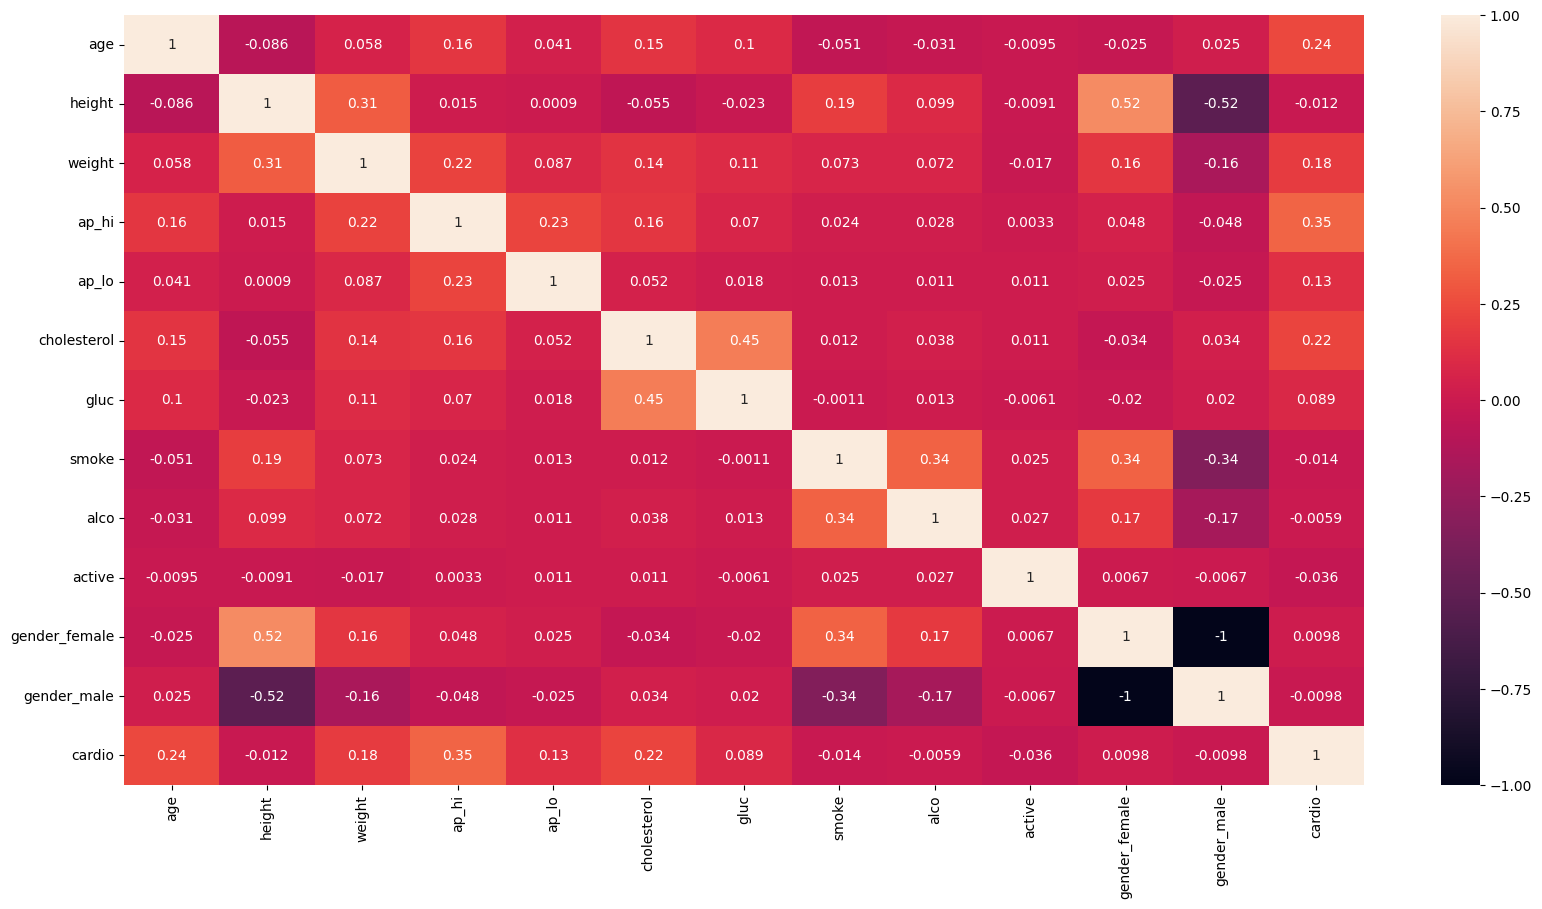

In [46]:
# pearson correlation for x_train_final

fig,ax = plt.subplots(figsize=[20,10])

corr = df_train_final.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

List of action :  
1. numerical : 
    - outlier handled (winsorizer)
    - scaling using MinMaxScaler
2. categorical :
    - encoding using ohe for ['gender']

### Pipeline Preprocess

In [47]:
num_pipe = Pipeline([
        ('outlier', Winsorizer(capping_method='gaussian', fold=3, tail='both')),
        ('scaler', MinMaxScaler())
    ])

num_tr = num_pipe.fit_transform(X_train[num_col2])
num_tr

array([[0.7809047 , 0.69594189, 0.31238773, ..., 0.        , 0.        ,
        1.        ],
       [0.2175168 , 0.41077037, 0.37039181, ..., 0.        , 0.        ,
        0.        ],
       [0.59310873, 0.34966218, 0.38199263, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.84350336, 0.61446432, 0.4283959 , ..., 0.        , 0.        ,
        1.        ],
       [0.90610202, 0.77741947, 0.68361388, ..., 0.        , 0.        ,
        1.        ],
       [0.65570739, 0.81815826, 0.68361388, ..., 0.        , 0.        ,
        1.        ]])

In [48]:
cat_pipe = Pipeline([
    ('encoder', OneHotEncoder(sparse=False))
    ])

cat_tr = cat_pipe.fit_transform(X_train[['gender']])
cat_tr

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [49]:
pipe_preprocess = ColumnTransformer([
    ('pipe_1', num_pipe,num_col2),
    ('pipe_2', cat_pipe,cat_col2)
])

train_tr = pipe_preprocess.fit_transform(X_train)
train_tr

array([[0.7809047 , 0.69594189, 0.31238773, ..., 1.        , 1.        ,
        0.        ],
       [0.2175168 , 0.41077037, 0.37039181, ..., 0.        , 0.        ,
        1.        ],
       [0.59310873, 0.34966218, 0.38199263, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.84350336, 0.61446432, 0.4283959 , ..., 1.        , 0.        ,
        1.        ],
       [0.90610202, 0.77741947, 0.68361388, ..., 1.        , 1.        ,
        0.        ],
       [0.65570739, 0.81815826, 0.68361388, ..., 1.        , 1.        ,
        0.        ]])

In [50]:
test_tr = pipe_preprocess.transform(X_test)
test_tr

array([[0.90610202, 0.6552031 , 0.68361388, ..., 0.        , 1.        ,
        0.        ],
       [0.62440806, 0.87926645, 0.43999672, ..., 0.        , 1.        ,
        0.        ],
       [0.49921075, 0.69594189, 0.49800081, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.96870067, 0.61446432, 0.86922696, ..., 0.        , 1.        ,
        0.        ],
       [0.87480269, 0.43113976, 0.68361388, ..., 1.        , 0.        ,
        1.        ],
       [0.65570739, 0.57372553, 0.39359345, ..., 1.        , 0.        ,
        1.        ]])

### Model Definition

In this section, we are looking to performance from 5 types of model  

- Logistic Regression
- SVC
- Decision Tree
- Random Forest
- KNN

Initial Model

In [51]:
log_reg = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
rand_for = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

### Model Training

##### **Logistic Regression**

In [52]:
log_reg.fit(train_tr, y_train)

lr_train = log_reg.predict(train_tr)
lr_test = log_reg.predict(test_tr)

print(classification_report(y_train, lr_train))
print(100*'=')
print(classification_report(y_test, lr_test))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     27743
           1       0.74      0.68      0.71     27697

    accuracy                           0.72     55440
   macro avg       0.72      0.72      0.72     55440
weighted avg       0.72      0.72      0.72     55440

              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6936
           1       0.73      0.67      0.70      6925

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.71     13861
weighted avg       0.72      0.72      0.71     13861



##### **SVC**

In [53]:
svc.fit(train_tr, y_train)

svc_train = svc.predict(train_tr)
svc_test = svc.predict(test_tr)

print(classification_report(y_train, svc_train))
print(100*'=')
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     27743
           1       0.75      0.68      0.71     27697

    accuracy                           0.73     55440
   macro avg       0.73      0.73      0.73     55440
weighted avg       0.73      0.73      0.73     55440

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6936
           1       0.74      0.67      0.70      6925

    accuracy                           0.72     13861
   macro avg       0.72      0.72      0.72     13861
weighted avg       0.72      0.72      0.72     13861



##### **Decision Tree**

In [54]:
model_dt.fit(train_tr, y_train)

dt_train = model_dt.predict(train_tr)
dt_test = model_dt.predict(test_tr)

print(classification_report(y_train, dt_train))
print(100*'=')
print(classification_report(y_test, dt_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     27743
           1       0.99      0.96      0.98     27697

    accuracy                           0.98     55440
   macro avg       0.98      0.98      0.98     55440
weighted avg       0.98      0.98      0.98     55440

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6936
           1       0.64      0.62      0.63      6925

    accuracy                           0.64     13861
   macro avg       0.64      0.64      0.64     13861
weighted avg       0.64      0.64      0.64     13861



##### **Random Forest**

In [55]:
rand_for.fit(train_tr, y_train)

rf_train = rand_for.predict(train_tr)
rf_test = rand_for.predict(test_tr)

print(classification_report(y_train, rf_train))
print(100*'=')
print(classification_report(y_test, rf_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     27743
           1       0.98      0.97      0.98     27697

    accuracy                           0.98     55440
   macro avg       0.98      0.98      0.98     55440
weighted avg       0.98      0.98      0.98     55440

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6936
           1       0.70      0.70      0.70      6925

    accuracy                           0.70     13861
   macro avg       0.70      0.70      0.70     13861
weighted avg       0.70      0.70      0.70     13861



##### **KNN**

In [56]:
knn.fit(train_tr, y_train)

knn_train = knn.predict(train_tr)
knn_test = knn.predict(test_tr)

print(classification_report(y_train, knn_train))
print(100*'=')
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77     27743
           1       0.78      0.75      0.77     27697

    accuracy                           0.77     55440
   macro avg       0.77      0.77      0.77     55440
weighted avg       0.77      0.77      0.77     55440

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      6936
           1       0.66      0.64      0.65      6925

    accuracy                           0.65     13861
   macro avg       0.65      0.65      0.65     13861
weighted avg       0.65      0.65      0.65     13861



From the classification report above we should considered the recall score. which means that we want to reduce false negative and increase the sensivity from our model. class 1 means presence of diseas and class 0 absence the disease. From each model we considered to choose random forest. Next we should tuning the model for the best result.

#### Cross-Validation

In [69]:
# Model LogReg
scores_lr = cross_val_score(log_reg, train_tr, y_train,scoring="recall", cv=10)

print("recall scores:", scores_lr)
print(100*'=')
print("Mean recall:", scores_lr.mean())
print("Standard deviation:", scores_lr.std())

recall scores: [0.66859206 0.67148014 0.67184116 0.67220217 0.66931408 0.67833935
 0.6866426  0.69230769 0.68652943 0.68761286]
Mean recall: 0.678486153428951
Standard deviation: 0.008487189676294917


In [70]:
# # Model SVC
# scores_svc = cross_val_score(svc, train_tr, y_train,scoring="recall", cv=10)

# print("recall scores:", scores_svc)
# print(100*'=')
# print("Mean recall:", scores_svc.mean())
# print("Standard deviation:", scores_svc.std())

KeyboardInterrupt: 

In [ ]:
# Model Decision Tree

scores_dt = cross_val_score(model_dt, train_tr, y_train,scoring="recall", cv=10)

print("recall scores:", scores_dt)
print(100*'=')
print("Mean recall:", scores_dt.mean())
print("Standard deviation:", scores_dt.std())

**Hyper-param Tuning**

In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 40, stop = 80, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 10, stop = 50, num = 7)]
# Minimum number of samples required to split a node
min_samples_split = [10,20,30,40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20,30,40]
# criterion
criterion = ['gini','entropy']
# Method of selecting samples for training each tree
bootstrap = [True]

In [58]:
params = [
    {'n_estimators': n_estimators,        
     'max_features': max_features,            
     'max_depth': max_depth,
     'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,                           
     'criterion': criterion     
  }]


rand_search = RandomizedSearchCV(rand_for, params, cv=10,
                           scoring='recall',
                           return_train_score=True)
rand_search.fit(train_tr, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': [10, 16, 23, 30, 36, 43,
                                                       50],
                                         'max_features': ['auto'],
                                         'min_samples_leaf': [10, 20, 30, 40],
                                         'min_samples_split': [10, 20, 30, 40],
                                         'n_estimators': [40, 50, 60, 70, 80]}],
                   return_train_score=True, scoring='recall')

In [59]:
rand_search.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 43,
 'criterion': 'gini'}

We got the result of tuning

In [60]:
rand_search.best_score_

0.6962132062950694

best recall score of tuning

In [61]:
model = rand_search.best_estimator_

model.fit(train_tr, y_train)

model_train = model.predict(train_tr)
model_test = model.predict(test_tr)

print(classification_report(y_train, model_train))
print(classification_report(y_test, model_test))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     27743
           1       0.79      0.72      0.75     27697

    accuracy                           0.76     55440
   macro avg       0.77      0.76      0.76     55440
weighted avg       0.77      0.76      0.76     55440

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      6936
           1       0.75      0.69      0.72      6925

    accuracy                           0.73     13861
   macro avg       0.73      0.73      0.73     13861
weighted avg       0.73      0.73      0.73     13861



In [62]:
final_pipe = Pipeline([
            ('preprocess', pipe_preprocess),
            ('classification', model)
])

final_pipe.fit(X_train,y_train)
final_pipe.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [63]:
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('pipe_1',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'ap_hi', 'ap_lo',
                                                   'cholesterol', 'gluc',
                                                   'smoke', 'alco', 'active']),
                                                 ('pipe_2',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(sparse=False))]),
                                     

## Model Saving

Dalam tahap ini dilakukan penyimpanan model dan file lain terkait dengan hasil pembuatan model

In [64]:
# Save the Files

import pickle, joblib
import json

with open('model.pkl', 'wb') as file_1:
  pickle.dump(model, file_1)

with open ('full_pipe.pkl','wb' ) as file_2:
  pickle.dump(final_pipe, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(num_col2, file_3)

with open('list_cat_cols.txt','w') as file_4: 
  json.dump(cat_col2, file_4)

# with open('boosted.pkl', 'wb') as file_2:
#   pickle.dump(boost_model, file_2)

# with open('model_scaler.pkl', 'wb') as file_3:
#   pickle.dump(scaler, file_3)

# # with open('model_encoder.pkl', 'wb') as file_4:
# #   pickle.dump(encoder, file_4)



# # joblib.dump(num_pipeline, 'num_pipeline_model.joblib')
# with open('pipeline_predictor.pkl', 'wb') as file_7:
#     pickle.dump(final_pipe, file_7)
# joblib.dump(final_pipe, 'pipeline_predictor.joblib')

# with open ('pipeline_1.pkl','wb' ) as file_8:
#   pickle.dump(num_pipeline, file_8)

# with open ('pipeline_2.pkl','wb' ) as file_9:
#   pickle.dump(num2_pipeline, file_9)
  





In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55440 entries, 20646 to 1432
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          55440 non-null  float64
 1   gender       55440 non-null  object 
 2   height       55440 non-null  int64  
 3   weight       55440 non-null  float64
 4   ap_hi        55440 non-null  int64  
 5   ap_lo        55440 non-null  int64  
 6   cholesterol  55440 non-null  int64  
 7   gluc         55440 non-null  int64  
 8   smoke        55440 non-null  int64  
 9   alco         55440 non-null  int64  
 10  active       55440 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 5.1+ MB


In [66]:
X_train.describe()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000,55440.000000
mean,53.323828,164.380574,74.172332,128.979762,96.507377,1.367731,1.227832,0.088654,0.054058,0.803589
std,6.757798,8.182210,14.366804,162.073605,186.717919,0.680810,0.573362,0.284247,0.226135,0.397286
min,30.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,65.000000,207.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [67]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
20646,58.0,female,174,58.0,120,80,3,3,0,0,1
58725,40.0,male,160,63.0,110,70,1,1,0,0,0
20428,52.0,male,157,64.0,120,80,1,1,0,0,1
10270,46.0,male,145,45.0,90,50,1,1,0,0,0
32844,41.0,female,173,86.0,130,100,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
27084,54.0,male,165,84.0,110,70,1,1,0,0,1
18287,48.0,male,160,60.0,110,80,2,1,0,0,1
62121,60.0,male,170,68.0,150,90,1,1,0,0,1
16692,62.0,female,178,90.0,150,100,2,1,0,0,1


## Conclusion

Based on the analysist that we have known, here are the conclusion :  

- The best model that we have ran is Random Forest Classifier. It gives the best score of recall around 70%. We use recall for this model in order to reduce of the false negative.  
- From the case, recall visualized the sensitivity of model, when it predicted the disease as negative. But in reality it should be positive. So it's totally dangerous condition for patience. Then, the doctor should make the right decision.  
- So far, this model is good enough and certainly, it should be improved on the next utilization. 